In [ ]:
#Simulation of leaky Integrate-and-fire neuron

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


def ext_change(riext=15):
  # parameters of the model
  dt=0.1        #integration time step [ms]
  tau=10        #time constant [ms]
  E_L=-65       #resting potential [mV]
  theta=-55     #firing threshold [mV]
  RI_ext=15   #external input [mA/Ohm] #need a sliding bar like you did in HH model
  v=E_L

  #Data bins
  t = np.arange(0, 100, dt, dtype= "float64")
  v_rec=np.zeros((t.shape), dtype = "float64")
  t_rec=np.zeros((t.shape), dtype = "float64")
  s_rec=np.zeros((t.shape), dtype = "float64")
  theta_rec=np.full((t.shape), -55)

  for i,val in enumerate(t):
    s=v>theta
    v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)-riext))
    v_rec[i]=v
    t_rec[i]=val
    s_rec[i]=s


  # making subplots 
  plt.subplot(2, 1, 2)
  plt.plot(t_rec, v_rec, "b", label="cccc")
  plt.plot(t_rec, theta_rec, "b", color="black", linestyle="--")
  plt.ylim([-66, -54])
  plt.xlabel("Time (ms)")
  plt.ylabel("v (mV)")


  plt.subplot(2, 1, 1)
  plt.plot(t_rec, s_rec, ".r", marker = 'o')
  plt.ylim([0.9, 1.1])
  plt.xticks([])
  plt.yticks([])
  plt.ylabel("Spikes")

  plt.show()

# adding a slider

style = {'description_width': 'initial'}
 
riext_widget = widgets.IntSlider(min=0, max=40, step=1, value=15, description="RI_Ext")

control = widgets.VBox([riext_widget])

plot = widgets.interactive_output(ext_change, {'riext':riext_widget})
display(control, plot)

Output()

# Expected Output
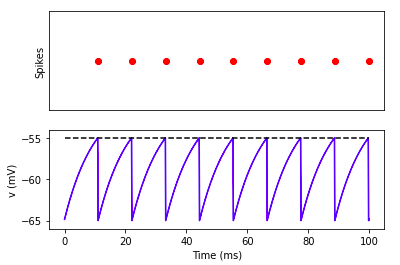